In [5]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
#!pip install wordcloud

In [76]:
def scrape_website(url):
    
    relevant_urls = []
    
    #Scrap All teh Urls contains in a website
    try:
        page = requests.get(url)
    except:
        page = urlopen(url)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    
    #Extract the Sentences from the url
    visible_text  = soup.getText()
    sentences = visible_text.splitlines()
    sen_cnt = len(sentences)
    #print(sen_cnt)
    
    #Fetching All the Links
    urls = [link.get('href') for link in soup.find_all('a')]
    
    #Filter out the links which have https in its string
    for url_ in urls:
        try:
            if url_.startswith('https://'):
                relevant_urls.append(url_)
                #print(url)
        except:
            pass
    
    #Generate a Word Cloud based on the Word Frequency
    words = ' '.join(soup.stripped_strings)
    wordcloud = WordCloud(collocations = False, background_color = 'white').generate(words)
    
    #Top 10 Keywords
    top_words = [word for word in wordcloud.words_]
    
    
    #Extract every image url
    images = [img.get('src') for img in soup.find_all('img')]
    #print(len(images))
    
    return pd.DataFrame({'Website URL': [url],
                        'Total Sentence Count':[sen_cnt],
                        'Top 10 frequent words': [top_words[:10]]}),wordcloud
    

In [77]:
df,wordcloud = scrape_website('https://www.programiz.com/python-programming')

In [78]:
df

,Website URL,Total Sentence Count,Top 10 frequent words
0,https://www.programiz.com/python-programming,959,"[Python, Learn, Tutorial, Examples, C, Course,..."


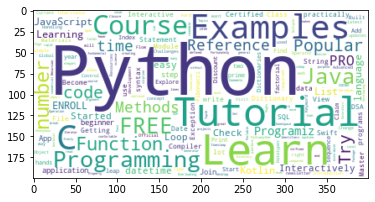

In [81]:
fig = plt.imshow(wordcloud, interpolation='bilinear')
